# In class stuff, week 02

First we will import and setup our notebook!

In [1]:
%matplotlib inline

The above is just to double make sure we have inline plots here.

Import packages that we are going to use in this notebook:

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

## 1. Image data -- Raster Images

Import the pillow package to read & do stuff with images:

In [3]:
import PIL.Image as Image

In [9]:
#!pwd

In [10]:
#!dir in windows

In [11]:
im = Image.open("/Users/jillnaiman/Downloads/stitch_reworked.png")
#im = Image.open('stitch_reworked.png')
# for windows this might look like: C:/Users/USER_NAME/Downloads/stitch_reworked.png
#    with your USER_NAME in there

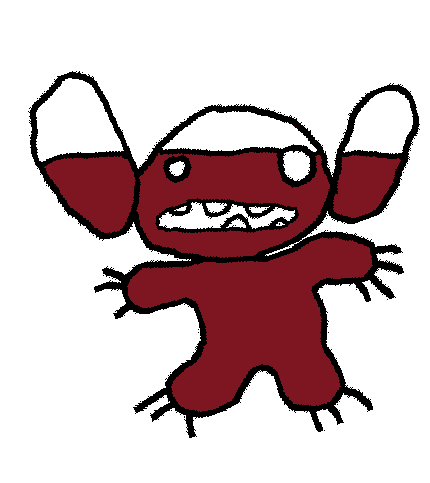

In [12]:
im

In [13]:
type(im)

PIL.PngImagePlugin.PngImageFile

Let's turn this into a matrix of values that we can mess with:

In [16]:
im_data = np.array(im)
im_data

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

In [17]:
im_data.shape

(483, 430, 4)

483 x 430 pixel image with 4 color channels: R=Red, G=Green, B=Blue, A=Alpha

<img src="https://i.pinimg.com/originals/b7/45/3a/b7453aedcbd060c8b842d85f27c083fb.jpg" width="400px">

We want to see how many unique colors are in our (raster image) -- we'll try with np.unique:

In [18]:
np.unique(im_data)

array([  0,  22,  33, 126, 255], dtype=uint8)

In [80]:
unqArray = np.unique(im_data)

In [82]:
unqArray.shape

(5,)

Aside: `uint8` is a datatype for unsigned 8-bit integers (0-255)

In [19]:
im_data.shape

(483, 430, 4)

We need to put our data as a list of RGBA color combos for each pixel and look for unique RGBA combos.

In [21]:
im_data.reshape(-1, im_data.shape[2])

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       ...,
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=uint8)

In [88]:
im_data.reshape(-1, im_data.shape[2]).shape

(207690, 4)

In [95]:
im_data.reshape(-2, im_data.shape[2]).shape #? -- - means unknown??

(207690, 4)

You can believe me that this works based on how it looks or:

In [22]:
im_data.reshape?

In [23]:
im_data.reshape(-1, im_data.shape[2]).shape

(207690, 4)

In [24]:
np.unique(im_data.reshape(-1, im_data.shape[2]), axis=0) # axis=0 means look across all pixels

array([[  0,   0,   0,   0],
       [  0,   0,   0, 255],
       [126,  22,  33, 255],
       [255, 255, 255, 255]], dtype=uint8)

Let's use this im_data to make an image with matplotlib:

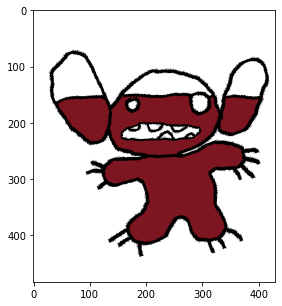

In [31]:
fig, ax = plt.subplots(figsize=(5,5)) # fig = canvas, ax = indiviual part of the fig-canvas to put data on

ax.imshow(im_data)

plt.show()

We want to be able to see the parts of our image that are perfectly see-through (perfectly transparent) -- "A" channel is 0.

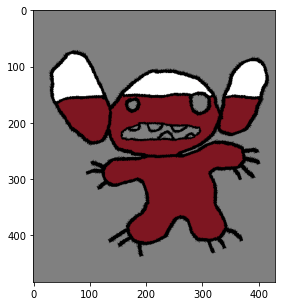

In [41]:
fig, ax = plt.subplots(figsize=(5,5)) # fig = canvas, ax = indiviual part of the fig-canvas to put data on

ax.set_facecolor('gray')
ax.imshow(im_data)

plt.show()

Make a boolean mask that will "mask out" data, R=255 (maximum red):

In [44]:
reds_good_mask = im_data[:,:,0] == 255 # [all of the y pixels, all of the x pixels, 0th RGBA = R]

In [43]:
reds_good_mask # boolean mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [45]:
im_data[reds_good_mask]

array([[255, 255, 255, 255],
       [255, 255, 255, 255],
       [255, 255, 255, 255],
       ...,
       [255, 255, 255, 255],
       [255, 255, 255, 255],
       [255, 255, 255, 255]], dtype=uint8)

We are lucky here that we have so few colors, but we really want to be sure we're only grabbing the "good" part of stitch -- that is when RGBA = [255, 255, 255, 255]

In [46]:
reds_good_mask = im_data[:,:,0] == 255 # [all of the y pixels, all of the x pixels, 0th RGBA = R]
green_good_mask = im_data[:,:,1] == 255 # [all of the y pixels, all of the x pixels, 1st RGBA = G]
blue_good_mask = im_data[:,:,2] == 255 # [all of the y pixels, all of the x pixels, 2nd RGBA = B]
alpha_good_mask = im_data[:,:,3] == 255 # [all of the y pixels, all of the x pixels, 2nd RGBA = A]

An aside: indexing magic!

In [47]:
myList = [1,2,3,4,5]

In [50]:
myList[3:]

[4, 5]

In [51]:
pixel_mask_good = reds_good_mask & green_good_mask & blue_good_mask & alpha_good_mask

In [52]:
good_pixels = im_data[pixel_mask_good]

In [53]:
ngood = len(good_pixels)
ngood

11929

This is an example of filtering... working toward mutation (calculating the # of good pixels).

In [54]:
# copy of my data to show only the good part of stitch
im_data_masked_good = im_data.copy()

Turn everything that is NOT in my good mask -- all the NON-good pixels, into 0's ==> perfectly transparent:

In [55]:
im_data_masked_good[~pixel_mask_good] = 0

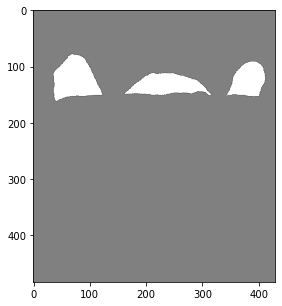

In [56]:
fig, ax = plt.subplots(figsize=(5,5)) # fig = canvas, ax = indiviual part of the fig-canvas to put data on

ax.set_facecolor('gray')
ax.imshow(im_data_masked_good)

plt.show()

In [59]:
pixel_mask_bad = (im_data[:,:,0] == 126) & (im_data[:,:,1] == 22) & \
                  (im_data[:,:,2] == 33) & \
                  (im_data[:,:,3] == 255)

In [60]:
nbad = len(im_data[pixel_mask_bad])

In [61]:
nbad

40949

goodness % = ngood/(ngood+nbad) & badness % = nbad/(ngood+nbad)

In [62]:
total = ngood+nbad
badness = nbad/total
goodness = ngood/total
print(badness, goodness)

0.774405234691176 0.22559476530882408


Make a barchart of goodness/badness:

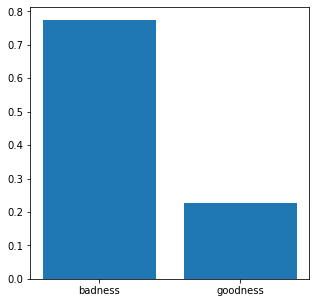

In [64]:
fig, ax = plt.subplots(figsize=(5,5))
# for a barchart need a set of labels & values
labels = np.array(['badness', 'goodness'])
values = np.array([badness, goodness])

ax.bar(labels, values)

plt.show()

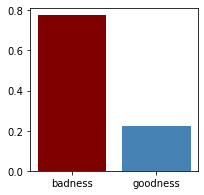

In [66]:
fig, ax = plt.subplots(figsize=(3,3))
# for a barchart need a set of labels & values
labels = np.array(['badness', 'goodness'])
values = np.array([badness, goodness])
colors = np.array(['maroon', 'steelblue'])

myBarChart = ax.bar(labels, values) # creating the barchart but NOT plotting yet...

for i in range(len(myBarChart)): # looping through all of the bars of my barchart...
    myBarChart[i].set_color(colors[i]) # setting the color of the ith barchart to the list of colors

plt.show()

We did this for a particular set of colors and bar-colors, but we want to do this for a general image.

In [67]:
number_of_pixels_of_a_color = [] # number of pixels of a particular color
color_labels = [] # what are the labels of our colors
color_values = [] # RGBA sequences

In [68]:
# grab unique colors
unique_colors = np.unique(im_data.reshape(-1, im_data.shape[2]), axis=0)

In [69]:
unique_colors

array([[  0,   0,   0,   0],
       [  0,   0,   0, 255],
       [126,  22,  33, 255],
       [255, 255, 255, 255]], dtype=uint8)

In [72]:
# loop and fill up our arrays
for icolor, rgba in enumerate(unique_colors):
    #print(icolor, rgba)
    reds_mask = im_data[:,:,0] == rgba[0] # [all of the y pixels, all of the x pixels, 0th RGBA = R]
    green_mask = im_data[:,:,1] == rgba[1] # [all of the y pixels, all of the x pixels, 1st RGBA = G]
    blue_mask = im_data[:,:,2] == rgba[2] # [all of the y pixels, all of the x pixels, 2nd RGBA = B]
    alpha_mask = im_data[:,:,3] == rgba[3] # [all of the y pixels, all of the x pixels, 2nd RGBA = A]
    
    pixel_mask = reds_mask & green_mask & blue_mask & alpha_mask
    
    # count all the pixels of a particular color
    npixels = len(im_data[pixel_mask])
    
    # store number of pixels in this rgba combo
    number_of_pixels_of_a_color.append(npixels)
    # naming colors
    color_labels.append("Color #" + str(icolor))
    # color values
    color_values.append(rgba/255) # just for matplotlib color stuff -> converting from 0->255 to 0->1.0

In [73]:
number_of_pixels_of_a_color

[135103, 19709, 40949, 11929]

In [74]:
color_values

[array([0., 0., 0., 0.]),
 array([0., 0., 0., 1.]),
 array([0.49411765, 0.08627451, 0.12941176, 1.        ]),
 array([1., 1., 1., 1.])]

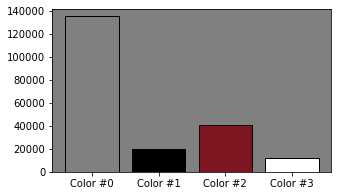

In [79]:
fig, ax = plt.subplots(figsize=(5,3))

ax.set_facecolor('gray')
myBarChart = ax.bar(color_labels, number_of_pixels_of_a_color) # creating the barchart but NOT plotting yet...

for i in range(len(myBarChart)): # looping through all of the bars of my barchart...
    myBarChart[i].set_color(color_values[i]) # setting the color of the ith barchart to the list of colors
    myBarChart[i].set_edgecolor('black')

plt.show()

In [100]:
x = np.array([[1,2,3],[4,5,6]])

In [101]:
x

array([[1, 2, 3],
       [4, 5, 6]])

In [102]:
np.sum(x)

21

In [103]:
np.sum(x,axis=0)

array([5, 7, 9])

In [104]:
np.sum(x,axis=1)

array([ 6, 15])

In [106]:
#np.sum(x,axis=2) # error happens here!